In [1]:
# Imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('data/weight-height.csv')

# Sample the data
sample = df.sample(n = 50, random_state = 42)

In [3]:
male_height = sample.loc[sample['Gender'] == 'Male', 'Height'].copy()
female_height = sample.loc[sample['Gender'] == 'Female', 'Height'].copy()

In [4]:
print(male_height.mean())
print(female_height.mean())

68.8972862188889
64.12766432


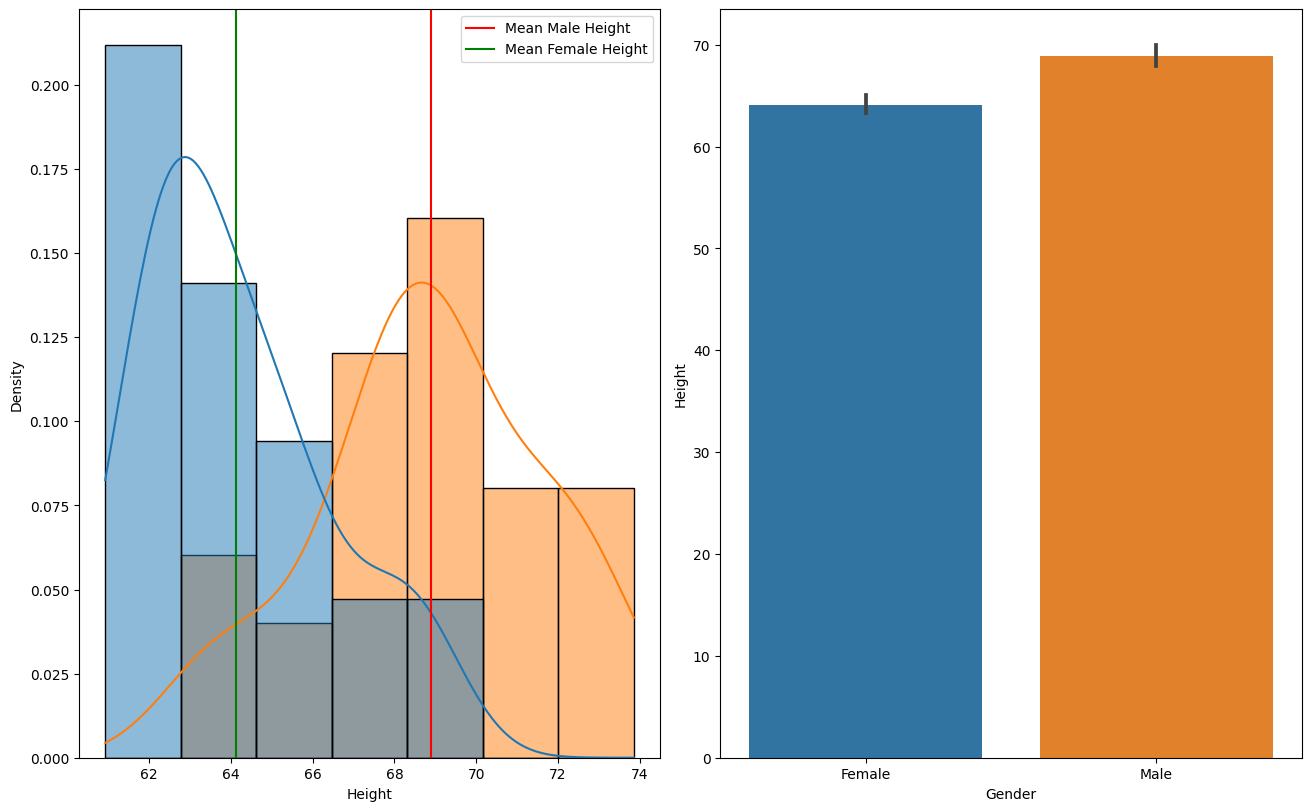

In [15]:
fig, (ax, ax_bar) = plt.subplots(figsize = (13, 8), ncols = 2,
                       constrained_layout = True);

ax = sns.histplot(data = sample, x = 'Height', fill = True, kde = True,
                  stat = 'density', common_norm = False, ax = ax, 
                  hue = 'Gender');
ax.axvline(np.mean(male_height), color = 'red', 
           label = 'Mean Male Height');
ax.axvline(np.mean(female_height), color = 'green', 
           label = 'Mean Female Height');
ax.legend();
sns.barplot(data = sample, x = 'Gender', y = 'Height', ax = ax_bar);

In [22]:
# Test for outliers
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f > 3)
print(np.sum(outliers_f))

zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m > 3)
print(np.sum(outliers_m))

0
0


In [24]:
# Normality test
print(stats.normaltest(female_height))
print(stats.normaltest(male_height))

NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)
NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)


In [25]:
# Equal variances test
stats.levene(female_height, male_height)

LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

In [26]:
# Independence t-test
stats.ttest_ind(female_height, male_height)

Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)